# Homework 4

1. When to Use Machine Learning:
- Machine learning is best used when dealing with large amounts of defined data that would make it tedious for a human to have to work through and interpret. 
- Some of the most beneficial uses of machine learning come from instances such as image recognition, catching email spam and malware, and online fraud recognition (Emeritus). 
- While maybe not as helpful to the average Joe, machine learning is also advantageous to social media companies, such as Facebook, that use it to analyze user data to ultimately achieve profits. Examples of how they do this include utilizing an in-house tool called “DeepText”, which able to extract meaning out of words using massive amounts of historical data to make assumptions based on the words around a specific word. Over time, the machine learns how to interpret words based on how they’re used. (Forbes)

When Not to Use Machine Learning:
- You should not use machine learning for “cold start” problems, meaning a problem with limited or no data. When there is no data for machine learning to work with, it is not awfully useful (Qymatix). For example, if you were attempting to predict the average snowfall in Denver, you would need some form of historical data to help the machine formulate a prediction. 
- Another example of when not to use machine learning is when labels are not clearly defined within the dataset. Establishing a clear set of parameters, especially when the data being presented is qualitative, is essential to help the machine produce reliable results (Towards Data Science). In other words, in some datasets, it is vital to define what inputs truly mean to the machine. If this is too cumbersome, it may be best to avoid machine learning. While large datasets are likely to be manipulated somewhat to be adequately analyzed, the amount of grunt work this might take to allow for machine learning might overshadow doing the work via other methods. 


Resources Used:

https://emeritus.org/blog/machine-learning-what-are-machine-learning-applications/#:~:text=One%20of%20the%20most%20notable,face%20detection%2C%20and%20face%20recognition.

https://www.forbes.com/sites/bernardmarr/2016/12/29/4-amazing-ways-facebook-uses-deep-learning-to-learn-everything-about-you/?sh=6da04f19ccbf

https://qymatix.de/en/situations-without-machine-learning/#:~:text=No%20Data%20%E2%80%9CCold%20Start%20Problem%E2%80%9D&text=You%20want%20to%20predict%20your,cannot%20generate%20recommendations%20from%20it.

https://towardsdatascience.com/to-use-or-not-to-use-machine-learning-d28185382c14

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_49446/3231498105.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import seaborn as sns
import seaborn.matrix as smatrix

In [3]:
data_df = pd.read_csv("titanic.csv")
data_df.head()
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_df.columns
data_df.dtypes
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_df['Fare'] = data_df['Fare'].astype(int)

In [ ]:
#2 
cols = ['SibSp','Parch','Ticket']
data_df = data_df.drop(cols, axis=1)
# I dropped some unnecessary columns here. 
# This makes viewing the data for the user and I more tolerable. 

In [ ]:
def replace_Sex(val):
    if val == "female":
        return 0
    else:
        return 1
    
data_df['Sex'] = data_df['Sex'].apply(replace_Sex, 1) 

# Converted passengers' sex to 0's and 1's to make the data more convienient later
# for machine learning to work with numerical data. 
# I noticed that for example, "Mr" and "Mrs" are included with the passengers name already 
# demonstrating the sex.

/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_48132/3907190937.py:7: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  data_df['Sex'] = data_df['Sex'].apply(replace_Sex, 1)


In [ ]:
data_df['Embarked'].mask(data_df['Embarked'] == 'C', 'Cherbourg', inplace=True)
data_df['Embarked'].mask(data_df['Embarked'] == 'S', 'Southhampton', inplace=True)
data_df['Embarked'].mask(data_df['Embarked'] == 'Q', 'Queenstown', inplace=True)

data_df.head()

# I updated the 'Embarked' column to make it clearer where passengers were departing.
# This will make the data easier to read later for viewers that are unaware of what the letters meant.

/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_48132/3327152599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Embarked'].mask(data_df['Embarked'] == 'C', 'Cherbourg', inplace=True)
/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_48132/3327152599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8,NaN,Southhampton


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

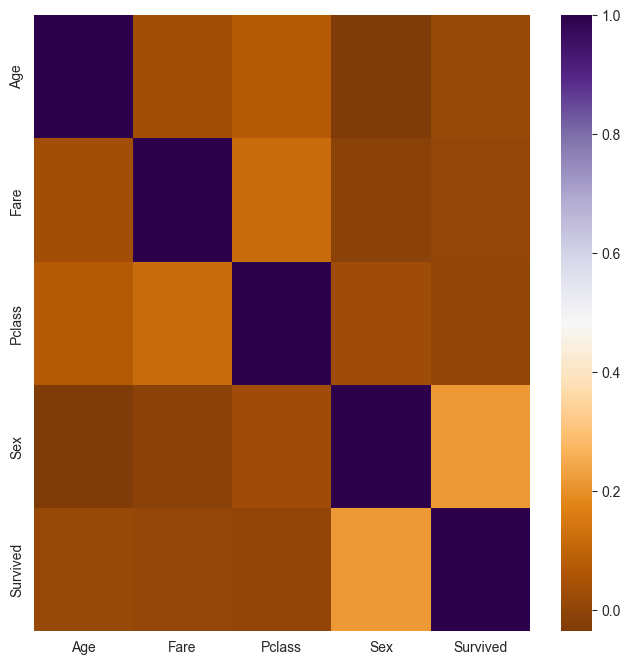

In [ ]:
#3.
data_df = pd.DataFrame(np.random.random((100,5)), columns=["Age","Fare","Pclass","Sex","Survived"])
corr_matrix=data_df.corr()
sns.heatmap(corr_matrix, cmap='PuOr')

plt.show()

Question 3 Takeways: 

    Using the above heatmap, one can determine areas of higher and lower correlation. One of the more obvious areas of correlation and one that jumps at the viewer on first glance is the higher correlation between 'Fare' and 'P Class' indicating that those that paid a higher fair were given a higher or more premier status. Besides this, one will notice the higher correlation between 'Survived' and 'Sex'. Although the graph itself doesn't show this, the rate of survival for females who boarded the Titanic was much greater than males. Seeing the higher correlation between these two fators makes sense.  

In [ ]:
import seaborn as sns

/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_49446/428861692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)


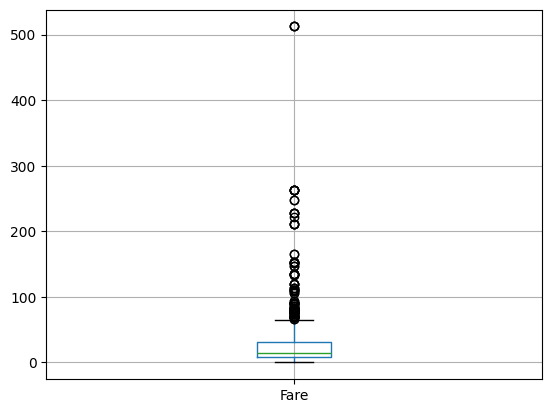

In [12]:
#4. 
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)
boxplot = data_df.boxplot(column=['Fare'], return_type='axes')
plt.show()


For handling the null values, I did not want to simply add 0 to fill the NaNs as this could contort the data in a way the spews innacurate findings. Instead, I replaced each null value with the mean of the equation to prevent the data from being thrown off wildly.

This box and whisker plot shows us that the median (green line) fare of the titanic was in the $8 range. The box itself shows us the range of fares from the 25th to 75th percentiles. Judging from the plot, most ticket prices would be relativetly close in price by today's standards. The whiskers themselves show us the range of data minus the outliers which are shown by the circles. 

In [7]:
# 5. 
def age_range(row):
    if row['Age'] <18:
        val = 'Child'
    elif (row['Age'] >17) and (row['Age']<30):
        val = 'Young Adult'
    elif (row['Age'] >29) and (row['Age']<50):
        val = 'Middle Age'  
    elif (row['Age'] >49) and (row['Age']<70):
        val = 'Senior'  
    else:
        val = 'Elderly'
    return val

if __name__ == '__main__': 
 
    
    dfLam = pd.read_csv('titanic.csv')
    import time
    
    
    tic = time.perf_counter()

    dfLam['Age_Range'] = dfLam.apply(age_range, axis=1)
  
    toc = time.perf_counter()
    lamTime = toc - tic

    dfSelect = pd.read_csv('titanic.csv')

    tic = time.perf_counter()

    conditions = [
        dfSelect['Age'].between(0, 18),
        dfSelect['Age'].between(17, 30),
        dfSelect['Age'].between(29, 50),
        dfSelect['Age'].between(49, 70),
        dfSelect['Age'] > 69
    ]

    age_ranges = ['Child', 'Young_Adult', 'Middle_Age', 'Senior', 'Elderly']

    dfSelect['Age_Range'] = np.select(conditions, age_ranges, default='Elderly')
    
    toc = time.perf_counter()
    selTime = toc - tic
    
    print("Age_Range Column using lambda:")
    print(dfLam['Age_Range'])
    print("----------------------------------")
    print("----------------------------------")
    print("Age_Range Column using np.select:")
    print(dfSelect['Age_Range'])
    print("----------------------------------")
    print("----------------------------------")
    print(f"Ranges set using lambda apply: {lamTime:0.4f} seconds")
    print(f"Ranges set using np.select: {selTime:0.4f} seconds")

    print("Any different results between methods are listed below")
    changed_rows = pd.concat([dfLam['Age_Range'], dfSelect['Age_Range']]).drop_duplicates(keep=False)
    print(changed_rows)
       
    



Age_Range Column using lambda:
0      Young Adult
1       Middle Age
2      Young Adult
3       Middle Age
4       Middle Age
          ...     
886    Young Adult
887    Young Adult
888        Elderly
889    Young Adult
890     Middle Age
Name: Age_Range, Length: 891, dtype: object
----------------------------------
----------------------------------
Age_Range Column using np.select:
0      Young_Adult
1       Middle_Age
2      Young_Adult
3       Middle_Age
4       Middle_Age
          ...     
886    Young_Adult
887    Young_Adult
888        Elderly
889    Young_Adult
890     Middle_Age
Name: Age_Range, Length: 891, dtype: object
----------------------------------
----------------------------------
Ranges set using lambda apply: 0.0071 seconds
Ranges set using np.select: 0.0008 seconds
Any different results between methods are listed below
Series([], Name: Age_Range, dtype: object)


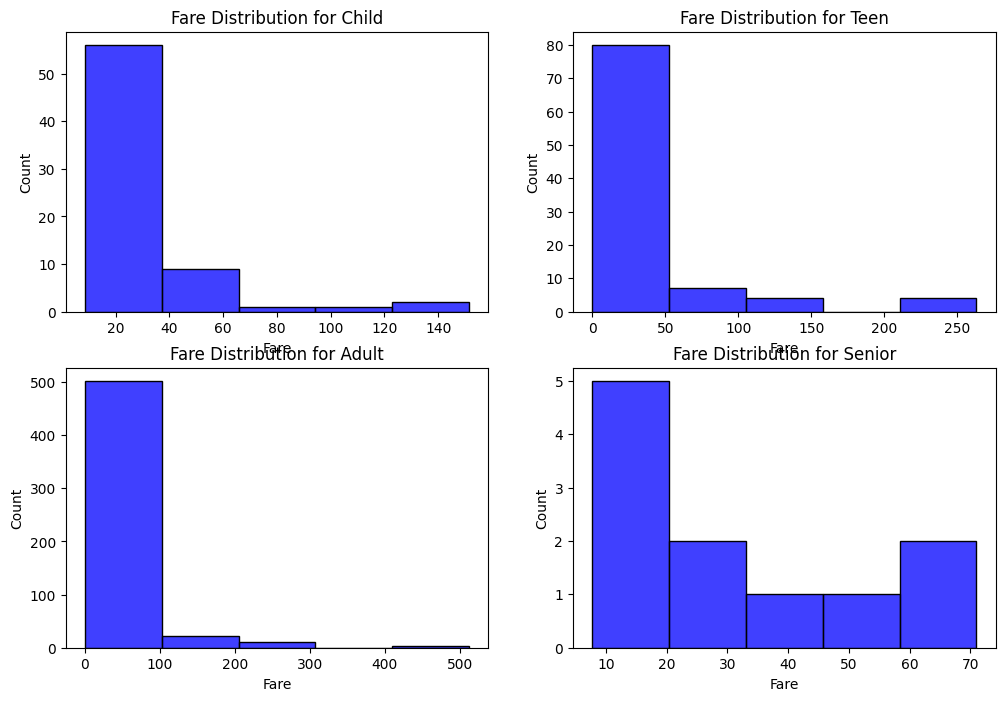

In [23]:
plt.figure(figsize=(12, 8))

age_bins = [0, 12, 18, 55, 100]
age_labels = ['Child', 'Teen', 'Adult', 'Senior',]

for i, age_range in enumerate(age_labels, start=1):
    plt.subplot(2, 2, i)

    subset = data_df[data_df['Age_Range'] == age_range]

    sns.histplot(subset['Fare'], bins=5, kde=False, color='blue', edgecolor='k', stat='count')

    plt.title(f'Fare Distribution for {age_range}')
    plt.xlabel('Fare')
    plt.ylabel('Count')


plt.show()

The above histograms make it obvious that Seniors paid, on average more than the rest of age groups that boarded the titanic. 